In [14]:
import pandas as pd
import numpy as np

# Load the dataset
url ="data.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()
df.isnull().sum()
df = df.dropna()

df.describe()
# Remove outliers (remove rows where price is above the 99th percentile)
price_99th_percentile = df['price'].quantile(0.99)
df = df[df['price'] <= price_99th_percentile]

from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
df['city'] = label_encoder.fit_transform(df['city'])

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the preprocessed dataset
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,-0.433264,-0.851357,-0.861079,-0.191369,-0.016737,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,36,WA 98133,USA
2,2014-05-02 00:00:00,342000.0,-0.433264,-0.190810,-0.201446,-0.078475,-0.946281,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,18,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,-0.433264,0.139463,-0.123184,-0.188067,-0.946281,0,0,4,1000,1000,1963,0,857 170th Pl NE,3,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,0.674588,0.469737,-0.190265,-0.118960,-0.946281,0,0,4,1140,800,1976,1992,9105 170th Ave NE,31,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,-1.541115,-1.511904,-1.375370,-0.234232,-0.946281,0,0,3,880,0,1938,1994,522 NE 88th St,35,WA 98115,USA


# 3.(a)Model Implementation
Regression Task:
We will apply Linear Regression and Decision Tree Regression.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable for regression
X_reg = df[['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'city']]
y_reg = df['price']

# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_reg, y_train_reg)
y_pred_lr = lr_model.predict(X_test_reg)

# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_reg, y_train_reg)
y_pred_dt = dt_model.predict(X_test_reg)

# Evaluate the models
mse_lr = mean_squared_error(y_test_reg, y_pred_lr)
r2_lr = r2_score(y_test_reg, y_pred_lr)
mse_dt = mean_squared_error(y_test_reg, y_pred_dt)
r2_dt = r2_score(y_test_reg, y_pred_dt)

print(f"Linear Regression - MSE: {mse_lr}, R2: {r2_lr}")
print(f"Decision Tree Regression - MSE: {mse_dt}, R2: {r2_dt}")

Linear Regression - MSE: 47280267623.89092, R2: 0.44050198807892027
Decision Tree Regression - MSE: 81890994072.81203, R2: 0.030930858038813458


3 (b). **For Classification task implemented logistic regression and SVM**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


price_threshold = df['price'].median()
df['price_category'] = np.where(df['price'] >= price_threshold, 'expensive', 'affordable')

# Define features and target
X_clf = df[['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'city']]
y_clf = df['price_category']

# Split the data into training and testing sets
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_clf, y_train_clf)
y_pred_logreg = logreg_model.predict(X_test_clf)

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train_clf, y_train_clf)
y_pred_svm = svm_model.predict(X_test_clf)

# Evaluate the models
accuracy_logreg = accuracy_score(y_test_clf, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test_clf, y_pred_logreg)
class_report_logreg = classification_report(y_test_clf, y_pred_logreg)

accuracy_svm = accuracy_score(y_test_clf, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test_clf, y_pred_svm)
class_report_svm = classification_report(y_test_clf, y_pred_svm)

print(f"Logistic Regression - Accuracy: {accuracy_logreg}")
print(f"Confusion Matrix:{conf_matrix_logreg}")
print(f"Classification Report:{class_report_logreg}")

print(f"SVM - Accuracy: {accuracy_svm}")
print(f"Confusion Matrix:{conf_matrix_svm}")
print(f"Classification Report:{class_report_svm}")

Logistic Regression - Accuracy: 0.7135016465422612
Confusion Matrix:[[325 108]
 [153 325]]
Classification Report:              precision    recall  f1-score   support

  affordable       0.68      0.75      0.71       433
   expensive       0.75      0.68      0.71       478

    accuracy                           0.71       911
   macro avg       0.72      0.72      0.71       911
weighted avg       0.72      0.71      0.71       911

SVM - Accuracy: 0.7113062568605928
Confusion Matrix:[[325 108]
 [155 323]]
Classification Report:              precision    recall  f1-score   support

  affordable       0.68      0.75      0.71       433
   expensive       0.75      0.68      0.71       478

    accuracy                           0.71       911
   macro avg       0.71      0.71      0.71       911
weighted avg       0.72      0.71      0.71       911



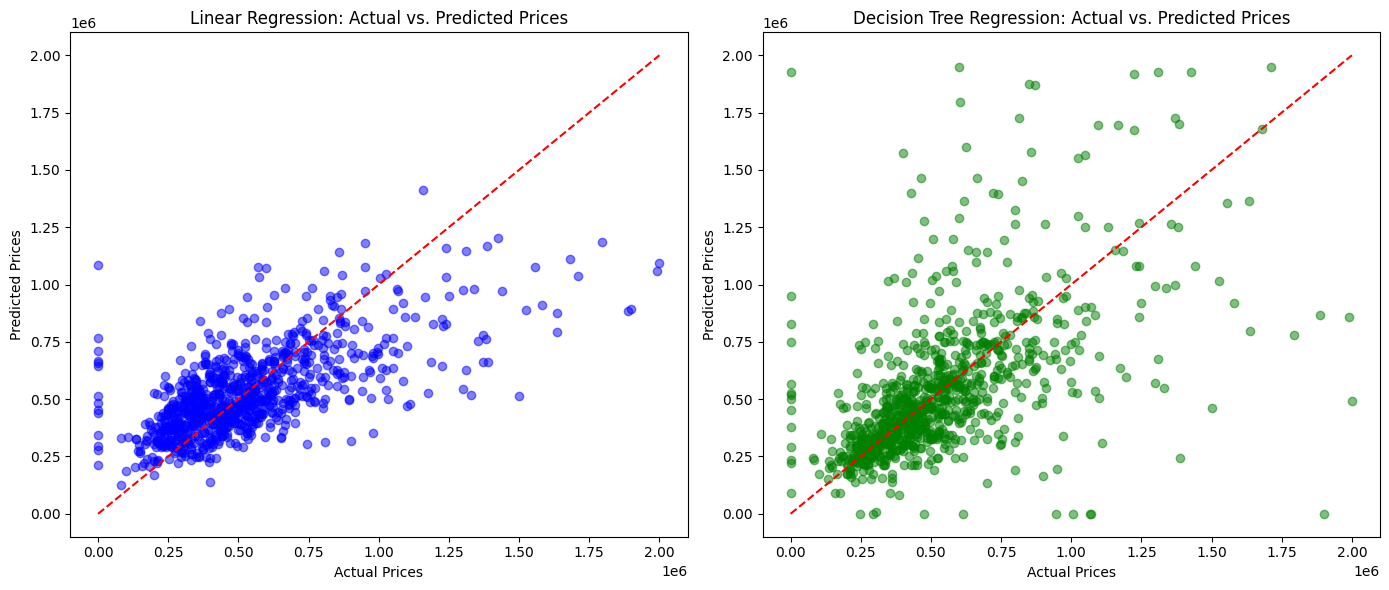

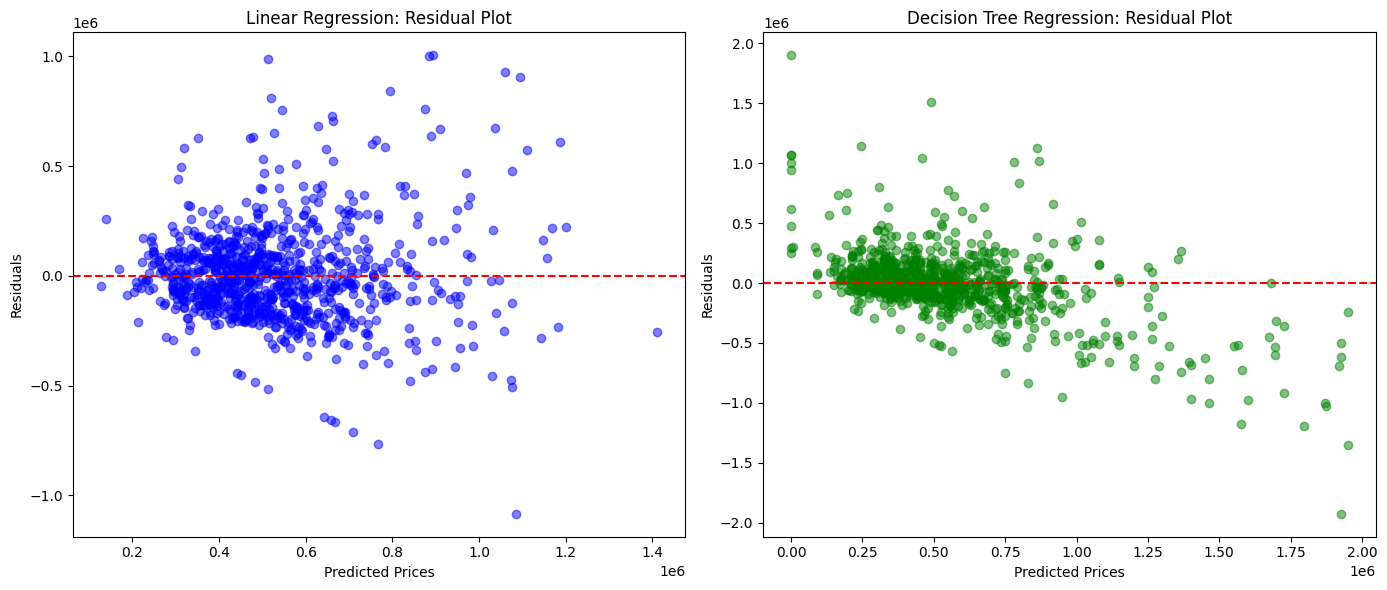

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizations
# 1. Scatter Plot: Actual vs. Predicted Values
plt.figure(figsize=(14, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test_reg, y_pred_lr, alpha=0.5, color='blue')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs. Predicted Prices')

# Decision Tree Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test_reg, y_pred_dt, alpha=0.5, color='green')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Decision Tree Regression: Actual vs. Predicted Prices')

plt.tight_layout()
plt.show()

# 2. Residual Plot: Errors for Both Models
plt.figure(figsize=(14, 6))

# Linear Regression Residuals
residuals_lr = y_test_reg - y_pred_lr
plt.subplot(1, 2, 1)
plt.scatter(y_pred_lr, residuals_lr, alpha=0.5, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residual Plot')

# Decision Tree Regression Residuals
residuals_dt = y_test_reg - y_pred_dt
plt.subplot(1, 2, 2)
plt.scatter(y_pred_dt, residuals_dt, alpha=0.5, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Decision Tree Regression: Residual Plot')

plt.tight_layout()
plt.show()



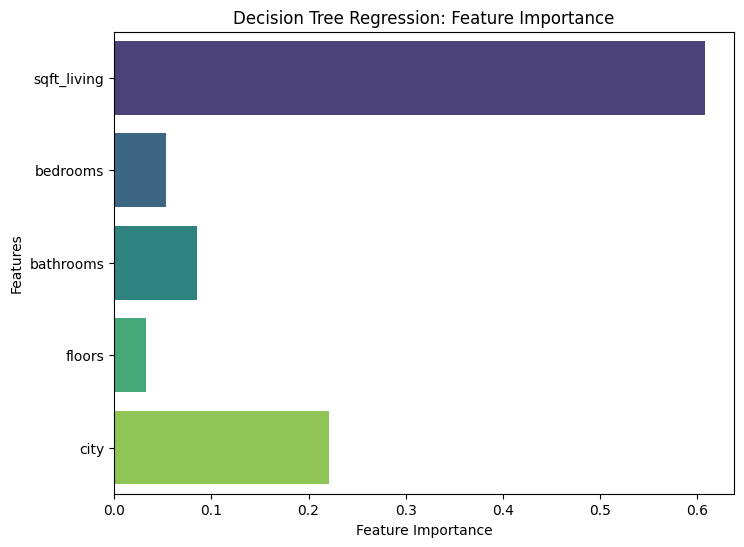

In [10]:
# 3. Feature Importance Plot (for Decision Tree Regression)
feature_importances = dt_model.feature_importances_
features = X_reg.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=features, hue=features, palette='viridis', legend=False)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Regression: Feature Importance')
plt.show()

***Visualization for Classifications ***

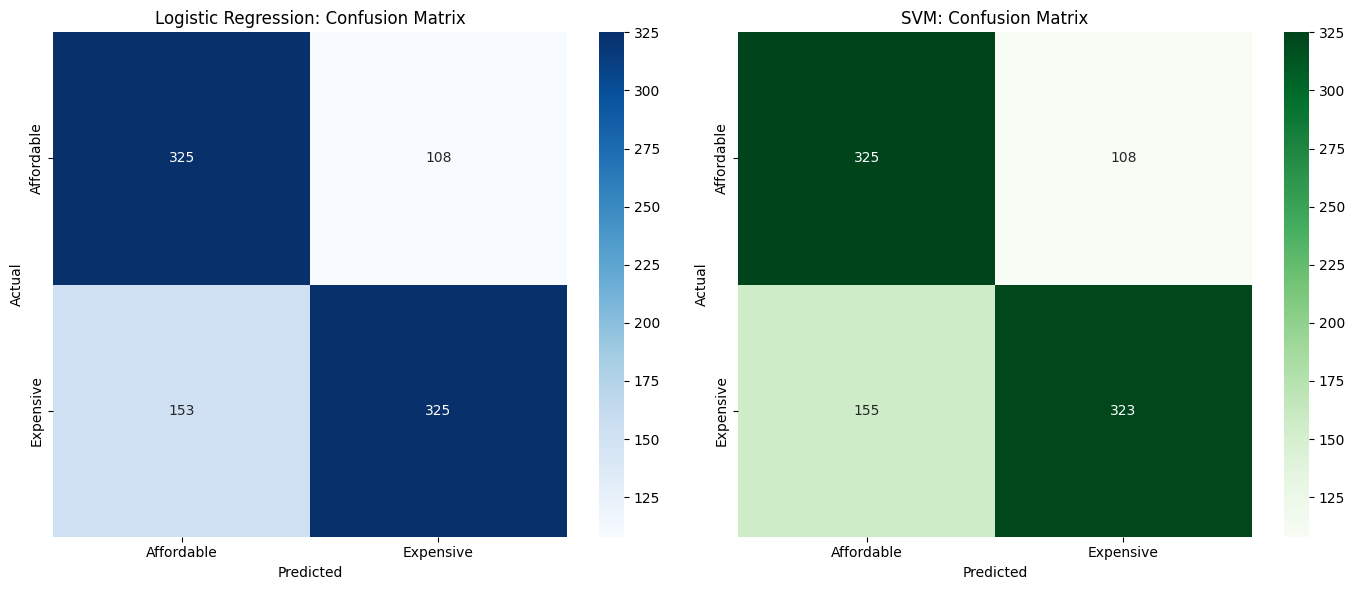

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

#Visualizations
#Confusion Matrix Heatmap
plt.figure(figsize=(14, 6))

# Logistic Regression Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Affordable', 'Expensive'], yticklabels=['Affordable', 'Expensive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression: Confusion Matrix')

# SVM Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Greens', xticklabels=['Affordable', 'Expensive'], yticklabels=['Affordable', 'Expensive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM: Confusion Matrix')
plt.tight_layout()
plt.show()


**Model Performance Comparison:**
*   Linear Regression - MSE: 47280267623.89092, R2: 0.44050198807892027
*   Decision Tree Regression - MSE: 81890994072.81203, R2: 0.030930858038813458

**Results Interpretation:**
*  The linear model achieved higher performance than Decision Tree Regression based on R2 score evaluation.
* The Decision Tree Regression evaluation of MSE indicates that the model potentially overfits the data because it produced a higher value.

**Classifications**
*  Logistic Regression: The Accuracy is 71.35%, Balanced precision and recall.
*  SVM: The Accuracy is 71.13%, Performs similarly to Logistic Regression.

**Potential Implications:**
*  The analysis indicates that Linear Regression shows better reliability when used to predict prices in this house data.
* The flexibility of Decision Tree Regression needs adjustment to avoid model overfitting for better generalization performance.